# Variance Bias Tradeoff

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import sklearn.pipeline as Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1,4,15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize = (14,5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline.Pipeline([('polynomial_features', polynomial_features),('linear_regression', linear_regression)])
    
    pipeline.fit(X[:,np.newaxis], y)
    
    #cross validation
    scores = cross_val_score(pipeline, X[:,np.newaxis], y, scoring = 'neg_mean_squared_error', cv=10)
    
    X_test = np.linspace(0,1,100)
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label = 'Model')
    plt.plot(X_test, true_fun(X_test), label = 'True Function')
    plt.scatter(X,y,edgecolor = 'b', s=20, label = 'Samples')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))
    plt.show()

Automatically created module for IPython interactive environment


<Figure size 1400x500 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

## Validation Curve for Ridge Regression

In [3]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

np.random.seed(0)
iris = load_iris()
X,y = iris.data, iris.target
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X,y = X[indices], y[indices]
param_name = 'alpha'
param_range = np.logspace(-5,2,10)

train_scores, valid_scores = validation_curve(Ridge(), X, y, param_name, param_range, scoring = 'r2', cv = 3)

print(train_scores)
print(valid_scores)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(valid_scores, axis = 1)
test_std = np.std(valid_scores, axis = 1)

[[0.94150358 0.92939313 0.92244506]
 [0.94150358 0.92939313 0.92244506]
 [0.94150358 0.92939313 0.92244506]
 [0.94150358 0.92939313 0.92244506]
 [0.94150339 0.929393   0.9224449 ]
 [0.94149675 0.92938833 0.92243943]
 [0.94131238 0.92925294 0.92228225]
 [0.93870328 0.92716514 0.91996856]
 [0.92516718 0.91614728 0.90850962]
 [0.87942953 0.8728143  0.86009528]]
[[0.90322731 0.92527005 0.94214064]
 [0.90322746 0.92526992 0.94214061]
 [0.90322831 0.92526914 0.94214048]
 [0.90323344 0.92526443 0.94213965]
 [0.90326384 0.92523621 0.94213459]
 [0.90343499 0.92506628 0.9421001 ]
 [0.90416119 0.92403569 0.94178028]
 [0.90486601 0.91832872 0.93878404]
 [0.89754269 0.8977839  0.92859896]
 [0.85075072 0.83340145 0.89975079]]


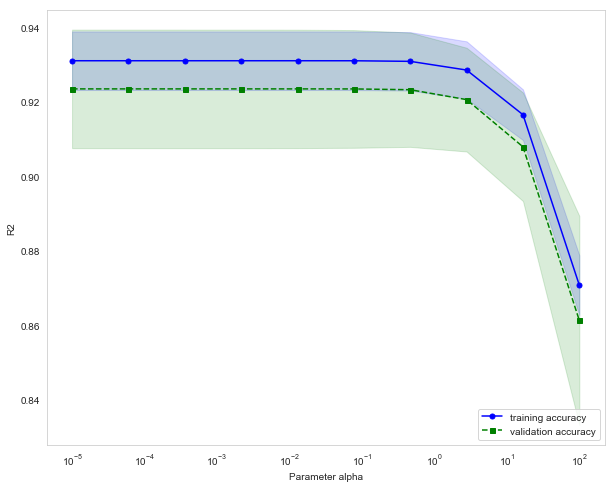

In [4]:
plt.figure(figsize = (10,8))
plt.plot(param_range, train_mean, color = 'blue', marker = 'o', markersize = '5', label = 'training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(param_range, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')
plt.grid()
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.xlabel('Parameter alpha')
plt.ylabel('R2')
plt.show()

## Plotting Validation Curve

In [5]:
print(__doc__)

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X,y = digits.data, digits.target

param_range = np.logspace(-6,-1,10)
train_scores, test_scores = validation_curve(SVC(), X, y, param_name = 'gamma', param_range = param_range, cv = 10,
                                             scoring = 'accuracy', n_jobs=1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores,axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores,axis = 1)

Automatically created module for IPython interactive environment


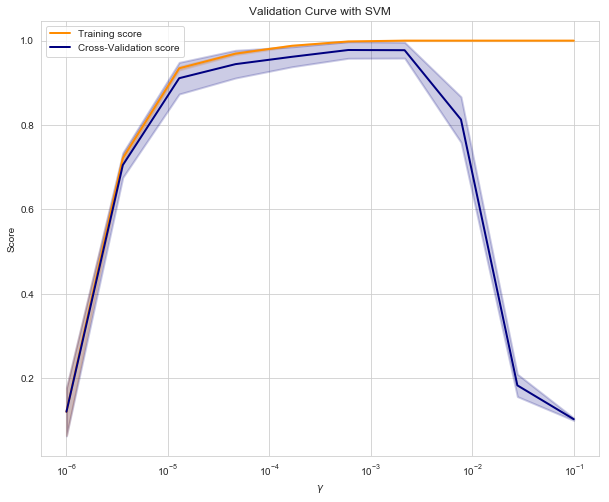

In [6]:
plt.figure(figsize = (10,8))
plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$')
plt.ylabel('Score')
lw = 2
plt.semilogx(param_range, train_scores_mean, label = 'Training score', color = 'darkorange', lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                alpha = 0.2, color = 'darkorange', lw=lw)
plt.semilogx(param_range, test_scores_mean, label = 'Cross-Validation score', color = 'navy', lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                alpha = 0.2, color = 'navy', lw=lw)
plt.legend(loc='best')
plt.show()

## Learning Curve

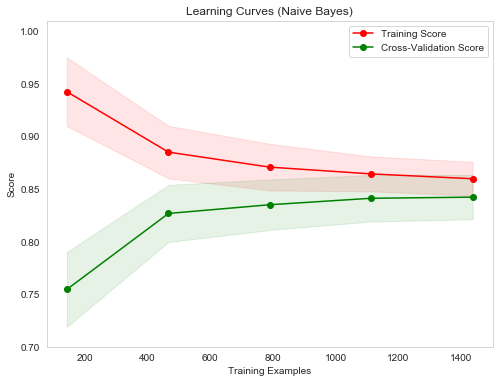

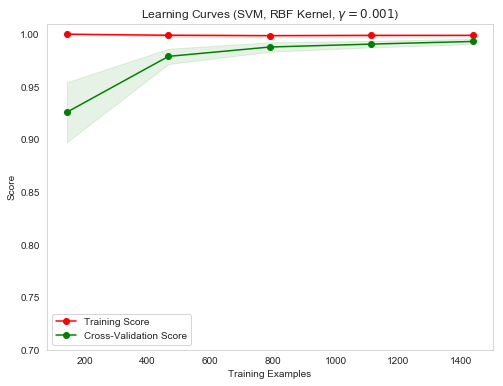

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None, n_jobs = 1, train_sizes = np.linspace(.1,1.0,5)):
    """
    Generate plot of test and training learning curve
    
    Parameters:
    
    estimator: object type that implements 'fit' and 'predict' methods
    
    title: string, title for chart
    
    X: array-like, shape (n_samples, n_features)
        Training vector
        
    y: array-like, shape (n_samples) or (n_samples, n_features), optional
        Target
        None for unsupervised learning
        
    ylim: tuple, shape (ymin, ymax), optional
        define min and max yvalues plotted
        
    cv: int, cross-validation generator or an iterable, optional
        Determines cross-validation splitting strategy\
        Possible inputs: None, integer, object, iterable
        
    n_jobs: integer, optional
        Number of jobs to run in parallel
    """
    
    plt.figure(figsize = (8,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,alpha = 0.1, color = 'g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'g', label = 'Cross-Validation Score')
    plt.legend(loc = 'best')
    return plt

digits = load_digits()
X, y = digits.data, digits.target

title = 'Learning Curves (Naive Bayes)'
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim = (0.7,1.01), cv=cv, n_jobs = 4)

title = 'Learning Curves (SVM, RBF Kernel, $\gamma=0.001$)'
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7,1.01), cv=cv, n_jobs=4)
plt.show()

# Boston Housing

## Learning Curve

<module 'matplotlib.pyplot' from 'C:\\Users\\Drake\\Anaconda3\\envs\\boston_housing\\lib\\site-packages\\matplotlib\\pyplot.py'>

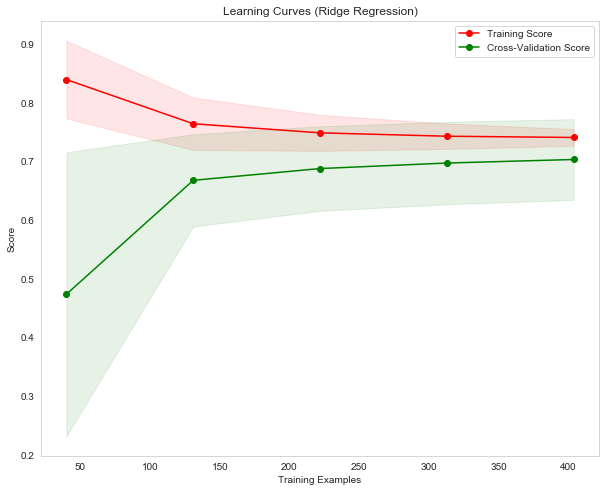

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None, n_jobs = 1, train_sizes = np.linspace(.1,1.0,5)):
    """
    Generate plot of test and training learning curve
    
    Parameters:
    
    estimator: object type that implements 'fit' and 'predict' methods
    
    title: string, title for chart
    
    X: array-like, shape (n_samples, n_features)
        Training vector
        
    y: array-like, shape (n_samples) or (n_samples, n_features), optional
        Target
        None for unsupervised learning
        
    ylim: tuple, shape (ymin, ymax), optional
        define min and max yvalues plotted
        
    cv: int, cross-validation generator or an iterable, optional
        Determines cross-validation splitting strategy\
        Possible inputs: None, integer, object, iterable
        
    n_jobs: integer, optional
        Number of jobs to run in parallel
    """
    
    plt.figure(figsize = (10,8))
    plt.title(title)
    #if ylim is not None:
        #plt.ylim(*ylim)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,alpha = 0.1, color = 'g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'g', label = 'Cross-Validation Score')
    plt.legend(loc = 'best')
    return plt

boston = load_boston()
X, y = boston.data, boston.target

title = 'Learning Curves (Ridge Regression)'
cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 0)

estimator = Ridge()
plot_learning_curve(estimator, title, X, y, ylim = (0.7,1.01), cv=cv, n_jobs = 4)

## Validation Curve

In [21]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge

np.random.seed(0)
boston = load_boston()
X,y = boston.data, boston.target
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X,y = X[indices], y[indices]
param_name = 'alpha'
param_range = np.logspace(-5,2,10)

train_scores, valid_scores = validation_curve(Ridge(), X, y, param_name, param_range, cv = 3)

print(train_scores)
print(valid_scores)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(valid_scores, axis = 1)
test_std = np.std(valid_scores, axis = 1)

[[0.76825443 0.74303931 0.7210551 ]
 [0.76825443 0.74303931 0.7210551 ]
 [0.76825443 0.7430393  0.7210551 ]
 [0.76825439 0.74303926 0.72105505]
 [0.76825283 0.74303754 0.72105336]
 [0.76820327 0.74298314 0.72099966]
 [0.76725428 0.74194427 0.71995868]
 [0.7627514  0.736966   0.71494081]
 [0.75728694 0.729739   0.70939354]
 [0.74220722 0.71106314 0.69250708]]
[[0.66942206 0.71645947 0.75776335]
 [0.66942183 0.71645966 0.75776306]
 [0.6694204  0.71646075 0.75776131]
 [0.66941181 0.71646725 0.75775078]
 [0.66935943 0.71650407 0.75768723]
 [0.6690187  0.71665695 0.75729426]
 [0.66672286 0.7164001  0.7549483 ]
 [0.65946794 0.71408791 0.74805763]
 [0.65259948 0.71626857 0.74213113]
 [0.63749334 0.70317644 0.72937164]]


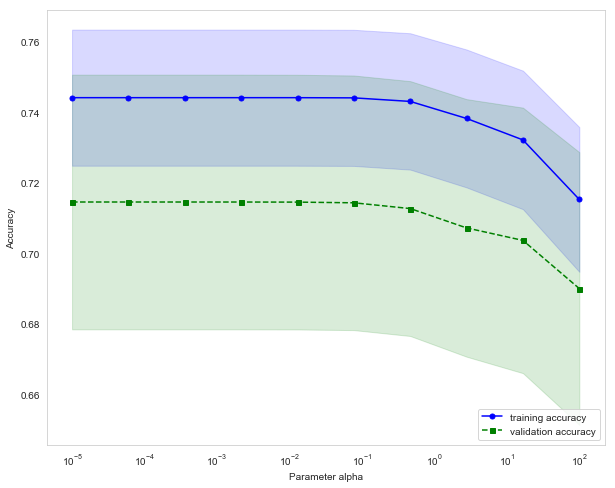

In [22]:
plt.figure(figsize = (10,8))
plt.plot(param_range, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'training accuracy')
plt.plot(param_range, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'validation accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.xlabel('Parameter alpha')
plt.ylabel('Accuracy')
plt.show()